In [92]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
iris = data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split 

#    **Splitting Data into Training and Test Sets**

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [97]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [98]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [99]:
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


In [100]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
max_score = 0
max_score_depth = 2
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    if score>max_score:
      max_score_depth = depth
    accuracy.append(score)

In [101]:
depths = pd.DataFrame({'Depth': list(range(1, 6)), 'Accuracy': accuracy})  

In [102]:
depths

,Depth,Accuracy
0,1,0.578947
1,2,0.894737
2,3,0.973684
3,4,0.973684
4,5,0.973684


In [103]:
max_score_depth

5

In [104]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [105]:
importances

,feature,importance
3,petal width (cm),0.581
2,petal length (cm),0.399
1,sepal width (cm),0.020
0,sepal length (cm),0.000


In [106]:
clf = DecisionTreeClassifier(max_depth = max_score_depth, 
                             random_state = 0)

In [107]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [108]:
Y_pred = clf.predict(X_test)

In [109]:
score = clf.score(X_test, Y_test)
print(score)

0.9736842105263158


## **Visualizing the Decision Tree**

In [110]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


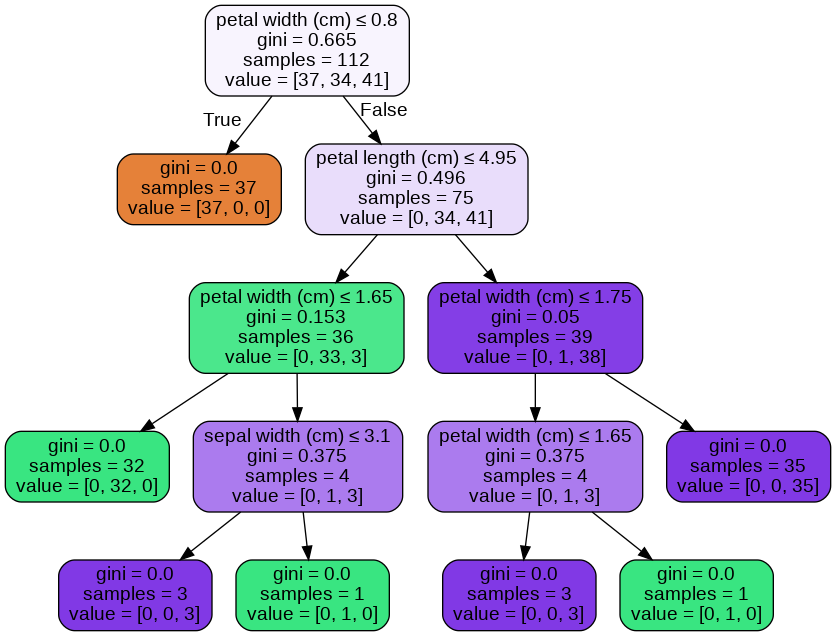

In [111]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## **Error Metrics**


In [112]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 0.02631578947368421


In [113]:
print('Mean Square Error:', 
      metrics.mean_squared_error(Y_test, Y_pred)) 

Mean Square Error: 0.02631578947368421
